# LAB 1: Solar Spectra
**Date: 15-12-23**

> **AIM:**<br>
> To plot the standard Solar Spectra. Compare the graph with Planck’s radiation equation and also investigate how spectral irradiance from a blackbody radiator depends on temperature.

> ##### Planck Law of Radiation
$\quad \quad E(\lambda)\text{d}\lambda = \dfrac{8 \pi h c^2}{\lambda^5}\dfrac{1}{e^{\frac{h c}{\lambda K T} - 1}}\text{d}\lambda$ <br>
Integrating over all $\lambda$ gives use the total energy radiated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.constants import c,hbar,k,Wien,h
from math import pi,e
import ipywidgets as widgets

In [2]:
data1 = pd.read_excel("AM0AM1_5.xls",header = 1,usecols = "A:D")
data2 = pd.read_excel("AM0AM1_5.xls",header = 1,usecols = "F:G")

In [3]:
data1.head()

,Wavelength (nm),Extraterrestrial W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24
3,281.5,0.212,1.566200e-19,2.747900e-22
4,282.0,0.267,1.194600e-18,2.834600e-21


In [4]:
data2.head()

,Wavelength (nm).1,W*m-2*nm-1
0,119.5,0.000062
1,120.5,0.000561
2,121.5,0.004901
3,122.5,0.001184
4,123.5,0.000048


In [5]:
T0 = 6072
def intensity(lamd,T = T0):
    return (8*h*c**2/lamd**5)*(1/(e**(h*c/(lamd*k*T)) - 1))*1e-14

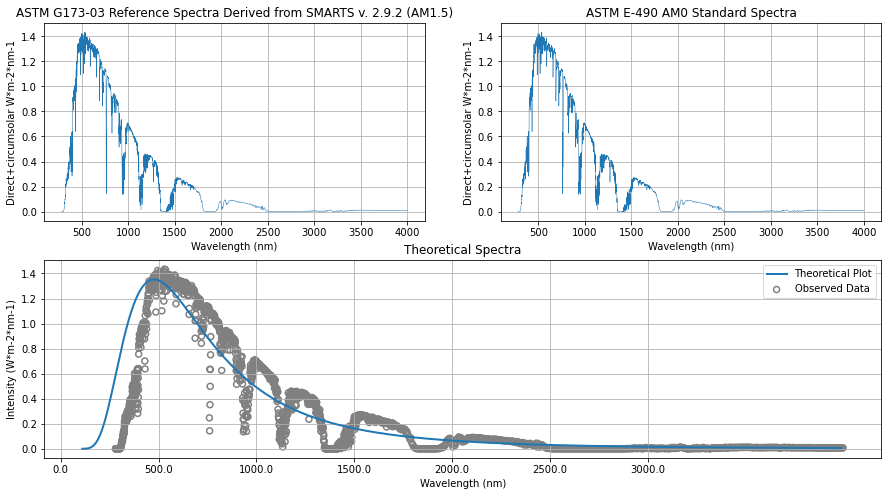

In [6]:
plt.figure(figsize = (15,8))

X1 = data1.iloc[:,0]
Y1 = data1.iloc[:,-1]

X2 = data1.iloc[:,0]
Y2 = data1.iloc[:,-1]

plt.subplot(2,2,1)
plt.plot(X1,Y1,linewidth = 0.5)
plt.grid()
plt.xlabel(X1.name)
plt.ylabel(Y1.name)
plt.title("ASTM G173-03 Reference Spectra Derived from SMARTS v. 2.9.2 (AM1.5)")

plt.subplot(2,2,2)
plt.plot(X2,Y2,linewidth = 0.5)
plt.grid()
plt.xlabel(X2.name)
plt.ylabel(Y2.name)
plt.title("ASTM E-490 AM0 Standard Spectra")

lamd = np.arange(110e-9,4000e-9,1e-8)
E = [intensity(i) for i in lamd]

plt.subplot(2,2,(3,4))
plt.plot(lamd,[intensity(i) for i in lamd],linewidth = 2,label = "Theoretical Plot")
plt.scatter([i*1e-9 for i in X2],Y2,marker = MarkerStyle('o','none'),label = "Observed Data",color = 'grey')
plt.xticks(ticks = [ 0.0e+00,  5.0e-07,  1.0e-06,  1.5e-06,  2.0e-06, 2.5e-06,  3.0e-06],
           labels = [i*1e9 for i in [ 0.0e+00,  5.0e-07,  1.0e-06,  1.5e-06,  2.0e-06, 2.5e-06,  3.0e-06]])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (W*m-2*nm-1)")
plt.title("Theoretical Spectra")
plt.legend()
plt.grid()
plt.show()

**Variation of Theoretical Spectra with Temperature**

In [8]:
def plotInteractiveSpectra(T):
    lamd = np.arange(110e-9,4000e-9,1e-8)
    plt.figure(figsize = (15,8))
    plt.rcParams['font.size'] = 20
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(lamd,[intensity(i,T) for i in lamd],linewidth = 2,label = f"{T}K")
    plt.plot(lamd,[intensity(i) for i in lamd],linewidth = 2,label = f"{T0}K")
    #plt.xlim(min(lamd),max(lamd))
    plt.xticks(ticks = [ 0.0e+00,  5.0e-07,  1.0e-06,  1.5e-06,  2.0e-06, 2.5e-06,  3.0e-06],
           labels = [i*1e9 for i in [ 0.0e+00,  5.0e-07,  1.0e-06,  1.5e-06,  2.0e-06, 2.5e-06,  3.0e-06]])
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity ($Wm^{-2} nm^{-1}$)")
    plt.title("Theoretical Spectra")
    plt.grid()
    plt.legend()
    plt.show()

widgets.interactive(plotInteractiveSpectra,
                    lamd = widgets.fixed(np.arange(110e-9,4000e-9,1e-8)),
                    T = widgets.IntSlider(value=6000,min = 2000,max = 10000))

interactive(children=(IntSlider(value=6000, description='T', max=10000, min=2000), Output()), _dom_classes=('w…